# California Housing Project

### Objectives

- Building a model of hosuing prices in the state of LA
- Model should learn from data and be able to predict the median housing prices in any district
- Model Output: **Prediction of District's Median Housing Price**

### Data Content

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

- longitude
- latitude
- housing_median_age
- total_rooms
- total_bedrooms
- population
- households
- median_income
- median_house_value
- ocean_proximity

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

### Import Data

In [2]:
housing = pd.read_csv("Cali Housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [3]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,89400,INLAND


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


- 10 columns in the dataset
- 20640 observations in each column, except `total_bedrooms` which has missing values
- 9 columns have numeric values, and one column `ocean_proximity` has categorical values

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


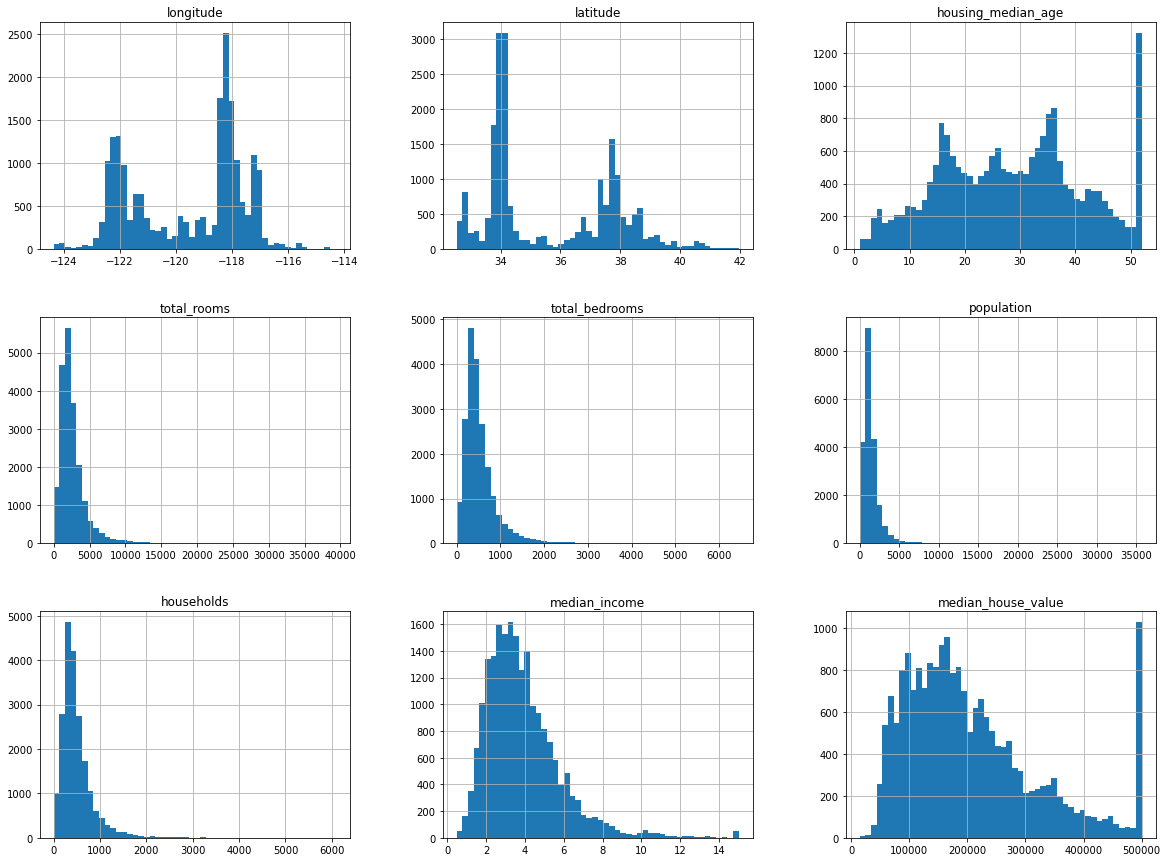

In [7]:
housing.hist(figsize=(20,15), bins=50)
plt.show()

### Creating Test Set

- To avoid *data snooping*
- First we create bins/categories for `median_income`
- Then we split the data into training & testing using **Stratified Shuffle** function in Scikit-Learn to ensure better *generalization* in the testing set

In [8]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0, 1.5, 3, 4.5, 6, np.inf],
                              labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

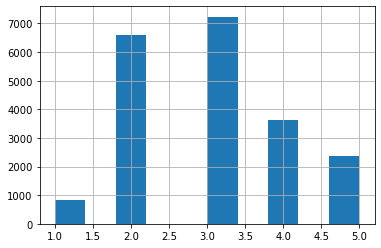

In [9]:
housing['income_cat'].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=17)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

Now let's drop the `income_cat` from the dataset and go back to the original one

In [14]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### EDA

In [15]:
data = strat_train_set.copy()

In [16]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

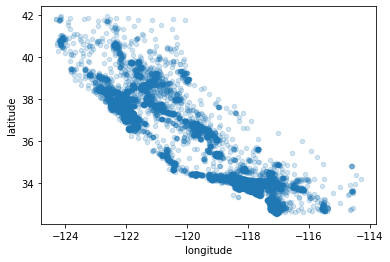

In [17]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

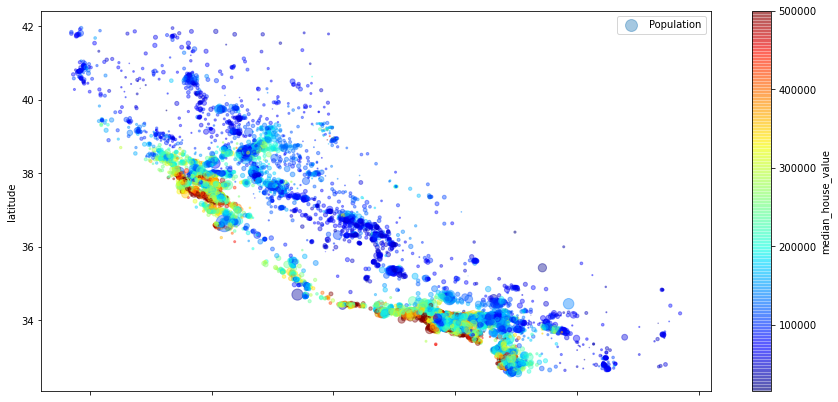

In [18]:
data.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
         s=data['population']/100, label='Population', figsize=(15,7),
         c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend();

**California housing prices**; Red is expensive, and Blue is cheap. Larger circles indicate areas with larger populations

### Correlation Check

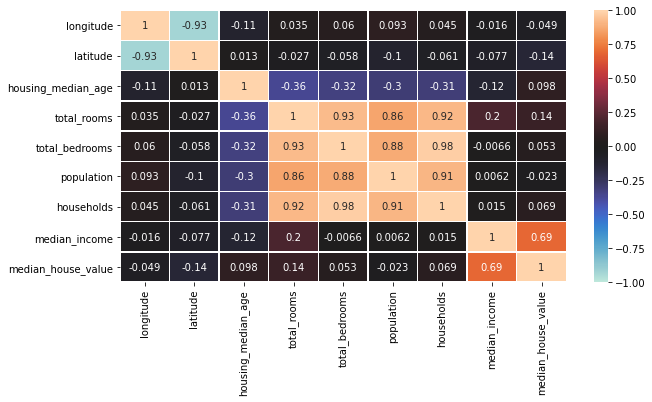

In [19]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            )

plt.show()

In [20]:
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.689783
total_rooms           0.137899
housing_median_age    0.098266
households            0.069313
total_bedrooms        0.053300
population           -0.023071
longitude            -0.048791
latitude             -0.140431
Name: median_house_value, dtype: float64

The strongest correlation with `median_house_value` is `median income` at 0.69

<Figure size 720x360 with 0 Axes>

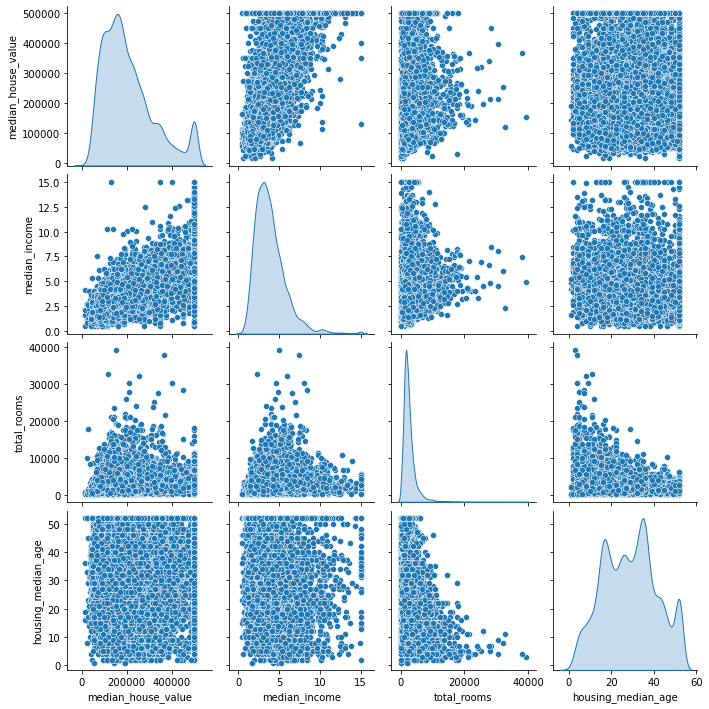

In [21]:
plt.figure(figsize=(10,5))
sns.pairplot(data[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']], diag_kind='kde');

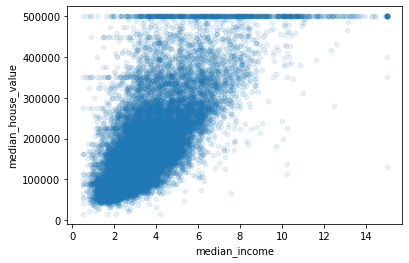

In [22]:
data.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1);

- Upward trend
- The points are not too dispersed
- The price cap is clearly visible at ~USD500,000
- There are three horizontal lines at ~USD450,000, at ~USD350,000 and at ~USD280,000
- Districts at those three lines need to be removed to avoid *data quirks*

### Attribute Combinations

- `total_rooms` is not a useful attribute as it doesn't tell how many households are there
- We need the number of rooms per household
- Similarly, `total_bedrooms` is not a useful attribute

In [23]:
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

In [24]:
data[['rooms_per_household', 'bedrooms_per_room', 'population_per_household']].describe().T

,count,mean,std,min,25%,50%,75%,max
rooms_per_household,16512.0,5.432375,2.575552,0.846154,4.434739,5.228085,6.049091,141.909091
bedrooms_per_room,16351.0,0.213303,0.058178,0.100000,0.175587,0.203104,0.240211,1.000000
population_per_household,16512.0,3.068366,10.632238,0.692308,2.431797,2.821238,3.280223,1243.333333


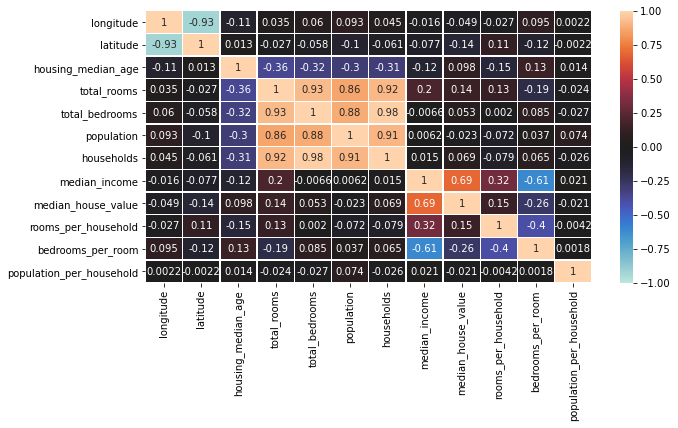

In [25]:
plt.figure(figsize=(10,5))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,
            )

plt.show()

In [26]:
data.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.689783
rooms_per_household         0.148209
total_rooms                 0.137899
housing_median_age          0.098266
households                  0.069313
total_bedrooms              0.053300
population_per_household   -0.020534
population                 -0.023071
longitude                  -0.048791
latitude                   -0.140431
bedrooms_per_room          -0.257914
Name: median_house_value, dtype: float64

- Not bad !! `bedrooms_per_room` is more correlated with `median_house_value` than `total_bedrooms`
- It seems that houses with less number of bedrooms/rooms ratio are more expensive !!
- `rooms_per_household` gives decent postive correlation with `median_house_value`

### Data Cleaning & Preparation

#### Numeric Data

In [27]:
data = strat_train_set.drop('median_house_value', axis=1)
data_labels = strat_train_set['median_house_value'].copy()

In [28]:
# Create a dataset for numeric values only 
data_num = data.drop('ocean_proximity', axis=1)

In [29]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4678 to 229
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 1.1 MB


`total_bedrooms` has missing values !! We have to *Impute* them before going to the modeling phase

In [30]:
# Using the SimpleImputer function to find the values using the Median Strategy

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [31]:
imputer.fit(data_num)

SimpleImputer(strategy='median')

In [32]:
imputer.statistics_

array([-118.48  ,   34.24  ,   29.    , 2130.5   ,  435.    , 1166.    ,
        409.5   ,    3.5355])

In [33]:
# Checking the Median Values from the dataset using .median() function 

data_num.median().values

array([-118.48  ,   34.24  ,   29.    , 2130.5   ,  435.    , 1166.    ,
        409.5   ,    3.5355])

Hurray !! the imputer is giving same median values .. Let's transform `data_num`

In [34]:
X = imputer.transform(data_num)

In [35]:
# Converting the transformed array into dataset

data_tr = pd.DataFrame(X, columns=data_num.columns, index=data_num.index)

In [36]:
# Double checking with info()

data_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4678 to 229
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


#### Categorical Data

In [37]:
data_cat = data[['ocean_proximity']]
data_cat.head(10)

,ocean_proximity
4678,<1H OCEAN
13950,INLAND
16929,NEAR OCEAN
9790,NEAR OCEAN
3313,INLAND
10920,<1H OCEAN
6539,<1H OCEAN
16536,INLAND
4707,<1H OCEAN
3867,<1H OCEAN


In [38]:
# Encoding the Categorical values with OneHotEncoder function from Scikit-Learn

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [39]:
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
# Showing the encoded values in an array

data_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Custom Transformer - Combined Attributes Adder

From the Correlation analysis, we have introduced new attributes (variables); `rooms_per_household`, `bedrooms_per_room` and `population_per_household`. These new attributes are required in the modeling phase and they may help to increase the efficiency of prediction. The next code will help to create, fit and transform the dataset for these attributes

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 4678 to 229
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  int64  
 3   total_rooms         16512 non-null  int64  
 4   total_bedrooms      16351 non-null  float64
 5   population          16512 non-null  int64  
 6   households          16512 non-null  int64  
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.3+ MB


In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

In [44]:
# Getting the required indices

col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    data.columns.get_loc(c) for c in col_names] # get the column indices

In [45]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(data.values)

In [46]:
housing_extra_attribs

array([[-118.34, 34.08, 52, ..., '<1H OCEAN', 8.78061224489796,
        3.510204081632653],
       [-117.07, 34.24, 21, ..., 'INLAND', 36.715384615384615,
        2.5923076923076924],
       [-122.32, 37.57, 33, ..., 'NEAR OCEAN', 4.267339218158891,
        3.3114754098360657],
       ...,
       [-116.84, 33.01, 5, ..., '<1H OCEAN', 7.117942283563362,
        3.2521957340025094],
       [-118.3, 33.75, 19, ..., '<1H OCEAN', 5.636363636363637,
        3.088516746411483],
       [-122.19, 37.79, 50, ..., 'NEAR BAY', 5.260869565217392,
        2.510869565217391]], dtype=object)

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(data.columns)+["rooms_per_household", "population_per_household"],
    index=data.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
4678,-118.34,34.08,52,1721,195,688,196,15.0001,<1H OCEAN,8.78061,3.5102
13950,-117.07,34.24,21,4773,1047,337,130,3.9375,INLAND,36.7154,2.59231
16929,-122.32,37.57,33,3384,819,2626,793,3.2285,NEAR OCEAN,4.26734,3.31148
9790,-121.84,36.25,20,958,245,590,189,2.6094,NEAR OCEAN,5.06878,3.12169
3313,-122.75,39.01,17,4162,967,889,414,3.4187,INLAND,10.0531,2.14734


In [48]:
# Cross-Check with the original dataset to see the added Combied Attributes
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4678,-118.34,34.08,52,1721,195.0,688,196,15.0001,<1H OCEAN
13950,-117.07,34.24,21,4773,1047.0,337,130,3.9375,INLAND
16929,-122.32,37.57,33,3384,819.0,2626,793,3.2285,NEAR OCEAN
9790,-121.84,36.25,20,958,245.0,590,189,2.6094,NEAR OCEAN
3313,-122.75,39.01,17,4162,967.0,889,414,3.4187,INLAND


The transformer has one *hyperparameter* `add_bedrooms_per_room` set to `True` by default. This hyperparameter will allow us to easily find out whether adding this attribute helps the ML algorithms or not. More generally, we can add a hyperparameter to gate any data preparation step that we are not 100% sure about.

#### Feature Scaling & Transformation Pipeline

- One of the most important transformations we need to apply is *feature scaling*
- There are many data transformation steps that need to be executed in the right order. We will use Scikit-Learn function called `Pipeline`

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
# Scaling & transformation will be applied on the numerical dataset (data_num)
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler())
                        ])
data_num_tr = num_pipeline.fit_transform(data_num)

In [51]:
data_num_tr

array([[ 6.05179192e-01, -7.17519923e-01,  1.85787661e+00, ...,
         1.30004679e+00,  4.15576713e-02, -1.51950721e+00],
       [ 1.23812245e+00, -6.42537961e-01, -6.10964214e-01, ...,
         1.21465043e+01, -4.47763813e-02,  7.81656286e-02],
       [-1.37837528e+00,  9.18024129e-01,  3.44716106e-01, ...,
        -4.52357822e-01,  2.28659630e-02,  4.19572133e-01],
       ...,
       [ 1.35274997e+00, -1.21896180e+00, -1.88520464e+00, ...,
         6.54468630e-01,  1.72903286e-02, -9.55964137e-01],
       [ 6.25114413e-01, -8.72170220e-01, -7.70244267e-01, ...,
         7.92042388e-02,  1.89526824e-03, -4.12975354e-01],
       [-1.31358581e+00,  1.02112433e+00,  1.69859656e+00, ...,
        -6.65918475e-02, -5.24361604e-02, -1.91686071e-01]])

In [52]:
# using `ColumnTransformer` for the final pipeline using the previously Transformers/Pipelines

from sklearn.compose import ColumnTransformer

In [53]:
num_attribs = list(data_num)
cat_attribs = ['ocean_proximity']

In [54]:
full_pipeline = ColumnTransformer([
                ('num', num_pipeline, num_attribs),
                ('cat', OneHotEncoder(), cat_attribs),
])
data_prepared = full_pipeline.fit_transform(data)

In [55]:
data_prepared[0]

array([ 0.60517919, -0.71751992,  1.85787661, -0.42008387, -0.82229109,
       -0.6602924 , -0.8014173 ,  5.87307921,  1.30004679,  0.04155767,
       -1.51950721,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

### Training the Models

#### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(data_prepared, data_labels)

LinearRegression()

In [58]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [669604.80917707 230350.81185991 217078.02190673 208801.24156856
 185201.66026337]
Labels: [500001, 115000, 234800, 362500, 200500]


In [59]:
#finding the RMSE for Linear Regression
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(data_prepared)
lin_mse = mean_squared_error(data_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE for Linear Regression:", lin_rmse)

RMSE for Linear Regression: 67613.87755335297


##### Linear Regression Cross Validation

Great tool is Scikit-Learn *K-fold Cross-Validation* feature. The following code randomly splits the training set into 10 distinct subsets called *folds*, then it trains and evaluates the Decision Tree Model 10 time, picking different fold for evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores.

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
lin_scores = cross_val_score(lin_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse = np.sqrt(-lin_scores)

In [62]:
print('Cross-Validation RMSE LR Scores: \n', lin_rmse, '\n')
print('Cross-Validation RMSE LR Scores Mean: \n', lin_rmse.mean(), '\n')
print('Cross-Validation RMSE LR Scores Std. Dev.: \n', lin_rmse.std())

Cross-Validation RMSE LR Scores: 
 [63507.05383024 70083.89078612 71710.31815159 67268.675357
 70438.37347684 65152.69964481 69821.29192583 68248.13984417
 68245.8830404  66162.62732761] 

Cross-Validation RMSE LR Scores Mean: 
 68063.89533846131 

Cross-Validation RMSE LR Scores Std. Dev.: 
 2442.4883922532167


#### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
tree_reg = DecisionTreeRegressor(random_state=17)
tree_reg.fit(data_prepared, data_labels)

DecisionTreeRegressor(random_state=17)

In [65]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', tree_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [500001. 115000. 234800. 362500. 200500.]
Labels: [500001, 115000, 234800, 362500, 200500]


In [66]:
#finding the RMSE for Decision Tree

from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE for Decision Tree Regressor:", tree_rmse)

RMSE for Decision Tree Regressor: 0.0


The model might be heavely **over-fitting** - We will check in the *Model Validation*

##### Decision Tree Cross-Validation 

In [67]:
tree_scores = cross_val_score(tree_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse = np.sqrt(-tree_scores)

In [68]:
print('Cross-Validation RMSE DT Scores: \n', tree_rmse, '\n')
print('Cross-Validation RMSE DT Scores Mean: \n', tree_rmse.mean(), '\n')
print('Cross-Validation RMSE DT Scores Std. Dev.: \n', tree_rmse.std())

Cross-Validation RMSE DT Scores: 
 [69024.57513228 70169.20817015 69073.63395665 71765.03108519
 70909.06049224 68223.64343011 70119.26921758 68646.73380828
 73216.65383444 71866.52389319] 

Cross-Validation RMSE DT Scores Mean: 
 70301.4333020105 

Cross-Validation RMSE DT Scores Std. Dev.: 
 1539.581599270541


#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=17)
rf_reg.fit(data_prepared, data_labels)

RandomForestRegressor(random_state=17)

In [71]:
# Checking the values predicted on some data

some_data = data.iloc[:5]
some_labels = data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', rf_reg.predict(some_data_prepared))
print('Labels:', list(some_labels))

Predictions: [500001. 131922. 239818. 295581. 183311.]
Labels: [500001, 115000, 234800, 362500, 200500]


In [72]:
#finding the RMSE for Random Forest

from sklearn.metrics import mean_squared_error
housing_predictions = rf_reg.predict(data_prepared)
rf_mse = mean_squared_error(data_labels, housing_predictions)
rf_rmse = np.sqrt(rf_mse)
print("RMSE for Random Forest Regressor:", rf_rmse)

RMSE for Random Forest Regressor: 18734.01772729683


##### Random Forest Cross-Validation

In [73]:
rf_scores = cross_val_score(rf_reg, data_prepared, data_labels, scoring='neg_mean_squared_error', cv=10)
rf_rmse = np.sqrt(-rf_scores)

In [74]:
print('Cross-Validation RMSE RF Scores: \n', rf_rmse, '\n')
print('Cross-Validation RMSE RF Scores Mean: \n', rf_rmse.mean(), '\n')
print('Cross-Validation RMSE RF Scores Std. Dev.:', rf_rmse.std())

Cross-Validation RMSE RF Scores: 
 [47605.61572104 51068.9524483  48979.00004537 51147.91993172
 52667.62462726 49005.14016746 48780.84320332 51538.65362872
 50046.83855689 49740.95977385] 

Cross-Validation RMSE RF Scores Mean: 
 50058.154810392196 

Cross-Validation RMSE RF Scores Std. Dev.: 1457.0908647341628


**Random Forest** seems to be the best model that gives the lowest *RMSE*

#### Grid Seach (GridSearchCV)

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = [
    {'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 8]},
    
    {'bootstrap': [False],
    'n_estimators' : [3, 30],
    'max_features' : [2, 3, 4]}
]

rf_reg = RandomForestRegressor(random_state=17)

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(data_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=4, n_estimators=30,
                      random_state=17)

In [79]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63638.547353947484 {'max_features': 2, 'n_estimators': 3}
54717.24741688262 {'max_features': 2, 'n_estimators': 10}
52332.13210383513 {'max_features': 2, 'n_estimators': 30}
60178.60593333196 {'max_features': 4, 'n_estimators': 3}
52783.33598785314 {'max_features': 4, 'n_estimators': 10}
50423.27611657448 {'max_features': 4, 'n_estimators': 30}
59569.99764121715 {'max_features': 6, 'n_estimators': 3}
52273.58727165885 {'max_features': 6, 'n_estimators': 10}
49403.28699488794 {'max_features': 6, 'n_estimators': 30}
58724.37005547715 {'max_features': 8, 'n_estimators': 3}
52168.92856996136 {'max_features': 8, 'n_estimators': 10}
49906.509045892635 {'max_features': 8, 'n_estimators': 30}
62156.63765190168 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
51424.63871791369 {'bootstrap': False, 'max_features': 2, 'n_estimators': 30}
59856.9474367021 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
49278.895518154386 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [80]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.114268,0.016920,0.006250,0.007654,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.892613e+09,-4.180241e+09,...,-4.049865e+09,1.010927e+08,18,-1.050566e+09,-1.106016e+09,-1.082324e+09,-1.114583e+09,-1.110659e+09,-1.092830e+09,2.392319e+07
1,0.334719,0.005475,0.015638,0.000019,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.886330e+09,-3.021819e+09,...,-2.993977e+09,6.050269e+07,11,-5.703053e+08,-5.727531e+08,-5.666338e+08,-5.686218e+08,-5.813684e+08,-5.719365e+08,5.126301e+06
2,1.257656,0.146199,0.059345,0.015065,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.676042e+09,-2.797705e+09,...,-2.738652e+09,3.988069e+07,9,-4.231486e+08,-4.256385e+08,-4.229163e+08,-4.151582e+08,-4.337588e+08,-4.241241e+08,5.965210e+06
3,0.182415,0.031318,0.003200,0.003919,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.662788e+09,-3.777013e+09,...,-3.621465e+09,1.500179e+08,16,-9.163666e+08,-9.379582e+08,-9.017921e+08,-9.520973e+08,-9.482117e+08,-9.312852e+08,1.926958e+07
4,0.505329,0.011257,0.015617,0.000029,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.721129e+09,-2.900076e+09,...,-2.786081e+09,6.473332e+07,10,-5.091849e+08,-5.093733e+08,-5.110668e+08,-5.251427e+08,-5.235179e+08,-5.156571e+08,7.130415e+06
5,1.468327,0.008530,0.040621,0.007666,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.481729e+09,-2.614333e+09,...,-2.542507e+09,4.487864e+07,5,-3.865505e+08,-3.818334e+08,-3.918617e+08,-3.911507e+08,-3.937368e+08,-3.890266e+08,4.303681e+06
6,0.210698,0.006995,0.000000,0.000000,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.589138e+09,-3.355898e+09,...,-3.548585e+09,1.024019e+08,14,-9.076106e+08,-8.478956e+08,-9.141018e+08,-9.254692e+08,-9.045225e+08,-8.999199e+08,2.698425e+07
7,0.674727,0.003766,0.012502,0.006251,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.633620e+09,-2.726118e+09,...,-2.732528e+09,8.587171e+07,8,-4.992553e+08,-4.841476e+08,-5.067214e+08,-5.012593e+08,-4.894477e+08,-4.961662e+08,8.203420e+06
8,1.993562,0.020433,0.037494,0.007650,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.407622e+09,-2.439346e+09,...,-2.440685e+09,3.270925e+07,3,-3.819955e+08,-3.686446e+08,-3.759777e+08,-3.720463e+08,-3.734958e+08,-3.744320e+08,4.464460e+06
9,0.265148,0.011027,0.003118,0.006235,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.385634e+09,-3.546443e+09,...,-3.448552e+09,5.382031e+07,13,-9.049767e+08,-8.835854e+08,-9.057206e+08,-9.399947e+08,-8.747674e+08,-9.018090e+08,2.256915e+07


#### Randomized Search (RandomizedSearchCV)

In [81]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [82]:
params_distribs = {
    'n_estimators' : randint(low=1, high=200),
    'max_features' : randint(low=1, high=10)
}

rf_reg = RandomForestRegressor(random_state=17)

random_search = RandomizedSearchCV(rf_reg, param_distributions=params_distribs, scoring='neg_mean_squared_error', cv=5,
    random_state=17, n_iter=10)

random_search.fit(data_prepared, data_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=17),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000221D3704400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000221D370EEE0>},
                   random_state=17, scoring='neg_mean_squared_error')

In [83]:
random_search.best_params_

{'max_features': 7, 'n_estimators': 151}

In [84]:
random_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=151, random_state=17)

In [85]:
cvres = random_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

51153.543140256734 {'max_features': 2, 'n_estimators': 144}
48748.20878203066 {'max_features': 7, 'n_estimators': 151}
53711.88847761571 {'max_features': 1, 'n_estimators': 174}
49267.17930790043 {'max_features': 7, 'n_estimators': 32}
49434.80132776797 {'max_features': 5, 'n_estimators': 40}
48799.26945341633 {'max_features': 5, 'n_estimators': 173}
49094.05306576629 {'max_features': 8, 'n_estimators': 130}
51987.50925368284 {'max_features': 2, 'n_estimators': 42}
51475.82353598058 {'max_features': 9, 'n_estimators': 11}
49658.65311181415 {'max_features': 3, 'n_estimators': 132}


In [86]:
pd.DataFrame(cvres)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.543390,0.055704,0.178400,0.012142,2,144,"{'max_features': 2, 'n_estimators': 144}",-2.571766e+09,-2.664483e+09,-2.640880e+09,-2.644489e+09,-2.561807e+09,-2.616685e+09,4.164714e+07,7
1,11.425896,0.038441,0.182774,0.006459,7,151,"{'max_features': 7, 'n_estimators': 151}",-2.318014e+09,-2.389903e+09,-2.428915e+09,-2.396460e+09,-2.348647e+09,-2.376388e+09,3.878577e+07,1
2,4.243032,0.112410,0.213839,0.006345,1,174,"{'max_features': 1, 'n_estimators': 174}",-2.860435e+09,-2.924254e+09,-2.862377e+09,-2.931690e+09,-2.846077e+09,-2.884967e+09,3.564007e+07,10
3,2.410833,0.005922,0.040605,0.007655,7,32,"{'max_features': 7, 'n_estimators': 32}",-2.350930e+09,-2.406522e+09,-2.452468e+09,-2.463808e+09,-2.462547e+09,-2.427255e+09,4.352630e+07,4
4,2.316030,0.007424,0.046875,0.000015,5,40,"{'max_features': 5, 'n_estimators': 40}",-2.375328e+09,-2.455709e+09,-2.497968e+09,-2.449946e+09,-2.440046e+09,-2.443800e+09,3.953798e+07,5
5,10.022541,0.103430,0.206191,0.006250,5,173,"{'max_features': 5, 'n_estimators': 173}",-2.331566e+09,-2.410523e+09,-2.427181e+09,-2.395585e+09,-2.341989e+09,-2.381369e+09,3.789963e+07,2
6,11.071846,0.069349,0.157581,0.002747,8,130,"{'max_features': 8, 'n_estimators': 130}",-2.346345e+09,-2.432373e+09,-2.467132e+09,-2.423094e+09,-2.382186e+09,-2.410226e+09,4.186034e+07,3
7,1.308364,0.007899,0.056240,0.007652,2,42,"{'max_features': 2, 'n_estimators': 42}",-2.644386e+09,-2.746535e+09,-2.734066e+09,-2.695055e+09,-2.693463e+09,-2.702701e+09,3.591560e+07,9
8,1.038024,0.005173,0.015630,0.000024,9,11,"{'max_features': 9, 'n_estimators': 11}",-2.649002e+09,-2.692406e+09,-2.680768e+09,-2.622054e+09,-2.604571e+09,-2.649760e+09,3.343778e+07,8
9,5.257617,0.018529,0.156209,0.000024,3,132,"{'max_features': 3, 'n_estimators': 132}",-2.465742e+09,-2.503805e+09,-2.490844e+09,-2.460037e+09,-2.409481e+09,-2.465982e+09,3.248507e+07,6


### Feature Importances for Models

#### Grid Search CV

In [87]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.19851237e-02, 7.73117751e-02, 4.06973178e-02, 2.56248836e-02,
       2.01503750e-02, 2.32501700e-02, 1.95488111e-02, 3.12103152e-01,
       5.98946939e-02, 9.70427987e-02, 9.06592650e-02, 1.91748942e-02,
       1.15702436e-01, 1.78117946e-04, 7.39234281e-03, 9.28384272e-03])

In [88]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31210315196115174, 'median_income'),
 (0.11570243647329483, 'INLAND'),
 (0.09704279872407104, 'pop_per_hhold'),
 (0.09065926499135352, 'bedrooms_per_room'),
 (0.08198512368122154, 'longitude'),
 (0.07731177508093308, 'latitude'),
 (0.05989469387351688, 'rooms_per_hhold'),
 (0.04069731779748684, 'housing_median_age'),
 (0.02562488364548434, 'total_rooms'),
 (0.023250170014856967, 'population'),
 (0.020150374970084907, 'total_bedrooms'),
 (0.019548811072190083, 'households'),
 (0.019174894234766985, '<1H OCEAN'),
 (0.009283842722132502, 'NEAR OCEAN'),
 (0.007392342811142269, 'NEAR BAY'),
 (0.00017811794631238513, 'ISLAND')]

#### Randomized Search CV

In [89]:
feature_importances = random_search.best_estimator_.feature_importances_
feature_importances

array([7.16629115e-02, 6.74221833e-02, 3.99699969e-02, 1.61559086e-02,
       1.52775275e-02, 1.57348857e-02, 1.43900179e-02, 3.46911899e-01,
       5.85562238e-02, 1.13290102e-01, 6.40690239e-02, 8.29892790e-03,
       1.61663274e-01, 2.07372511e-04, 2.23313159e-03, 4.15661480e-03])

In [90]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3469118986413089, 'median_income'),
 (0.1616632738287211, 'INLAND'),
 (0.11329010164196937, 'pop_per_hhold'),
 (0.07166291152835269, 'longitude'),
 (0.06742218325196155, 'latitude'),
 (0.06406902387820422, 'bedrooms_per_room'),
 (0.05855622381788249, 'rooms_per_hhold'),
 (0.03996999690737993, 'housing_median_age'),
 (0.01615590863176238, 'total_rooms'),
 (0.01573488567750431, 'population'),
 (0.015277527497798999, 'total_bedrooms'),
 (0.014390017900489896, 'households'),
 (0.00829892790339015, '<1H OCEAN'),
 (0.004156614796467082, 'NEAR OCEAN'),
 (0.0022331315857294304, 'NEAR BAY'),
 (0.00020737251107749144, 'ISLAND')]

### Evaluating The Model with TESTIING SET

In [91]:
final_model = random_search.best_estimator_

In [92]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [93]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [94]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

49147.461235319504

We can compute a 95% confidence interval for the test RMSE:

In [95]:
confidence = 0.95
squared_error = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_error) - 1,
                        loc=squared_error.mean(),
                        scale=stats.sem(squared_error)))

array([46820.6913477 , 51368.94736587])

We could compute the interval manually like this:

In [96]:
m = len(squared_error)
mean = squared_error.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_error.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(46820.69134770084, 51368.94736587275)

Alternatively, we could use a z-scores rather than t-scores:

In [97]:
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_error.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46821.39068890352, 51368.30993629761)

## Full Pipeline with Preparation & Prediction

In [98]:
full_pipeline_with_predictor = Pipeline([
    ('preparation', full_pipeline),
    ('predictor', random_search.best_estimator_)
])

full_pipeline_with_predictor.fit(data, data_labels)
full_pipeline_with_predictor.predict(some_data)

array([497045.33112583, 132901.33112583, 242666.88741722, 294536.42384106,
       184972.18543046])

In [99]:
some_labels

4678     500001
13950    115000
16929    234800
9790     362500
3313     200500
Name: median_house_value, dtype: int64

In [100]:
#final_model = full_pipeline_with_predictor

#import joblib as jb
#jb.dump(final_model, 'CalHosuing_model.pkl')

['CalHosuing_model.pkl']